# general yTub Ab staining


In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey
# ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/SuppFig3'

In [3]:
ls

SuppFig3 data.xlsx    SuppFig3.ipynb        ~$SuppFig3 data.xlsx


In [4]:
# reading in data
data = pd.read_excel('SuppFig3 data.xlsx', sheet_name = 'SuppFig 3C, D')
data

,file name,genotype,nb,phase,AC yTub,BC yTub,Cyto yTub,Unnamed: 7,AC yTub sub,BC yTub sub,Cyto yTub sub,Unnamed: 11,AC/Cyto yTub,BC/Cyto yTub,AC/BC yTub
0,2024-07-03 general yTub Ab_9_YW - 8 Image 9,WT,1,interphase,421,236,223,NaN,291,106,93,NaN,3.129032,1.139785,2.745283
1,NaN,WT,2,interphase,406,232,202,NaN,276,102,72,NaN,3.833333,1.416667,2.705882
2,NaN,WT,3,metaphase,447,324,209,NaN,317,194,79,NaN,4.012658,2.455696,1.634021
3,NaN,WT,4,metaphase,697,494,224,NaN,567,364,94,NaN,6.031915,3.872340,1.557692
4,NaN,WT,5,interphase,479,290,212,NaN,349,160,82,NaN,4.256098,1.951220,2.181250
5,NaN,WT,6,interphase,451,279,202,NaN,321,149,72,NaN,4.458333,2.069444,2.154362
6,NaN,WT,7,metaphase,711,462,222,NaN,581,332,92,NaN,6.315217,3.608696,1.750000
7,NaN,WT,8,interphase,447,253,229,NaN,317,123,99,NaN,3.202020,1.242424,2.577236
8,2024-07-03 general yTub Ab_21_yTubulin37C[3] -...,yTubulin37C[3],1,interphase,376,290,177,NaN,246,160,47,NaN,5.234043,3.404255,1.537500
9,NaN,yTubulin37C[3],2,metaphase,358,264,158,NaN,228,134,28,NaN,8.142857,4.785714,1.701493


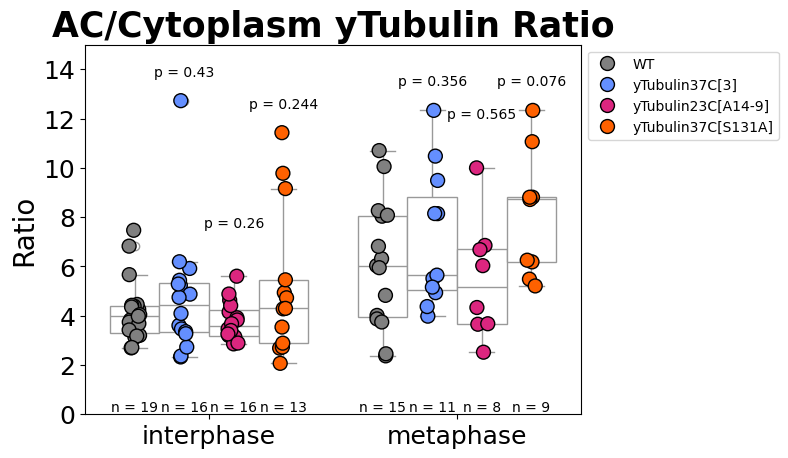

In [5]:
# plotting

p = ['grey', '#648FFF', '#DC267F', '#FE6100'] #blue, magenta, orange, and yellow palette for color blindness
po = ['interphase', 'metaphase']
ho = ['WT', 'yTubulin37C[3]', 'yTubulin23C[A14-9]', 'yTubulin37C[S131A]']
tick_size = 18
axis_size = 20
title_size = 25

sns.stripplot(data = data, x = 'phase', y = 'AC/Cyto yTub', hue = 'genotype', 
             order = po, hue_order = ho, palette = p,
             size = 10, linewidth = 1, edgecolor = 'k',
             dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/Cyto yTub', hue = 'genotype', 
             order = po, hue_order = ho, palette = ['w','w','w','w'],
             dodge = True, legend = False)

plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.xlabel('')
plt.ylabel('Ratio', fontsize = axis_size)
plt.title('AC/Cytoplasm yTubulin Ratio', fontsize = title_size, fontweight = 'bold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0,15)


# stats

# interphase wt vs 37C
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin37C[3]') & (data['phase']=='interphase')]['AC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (-0.1, param2.max()+1), ha = 'center')
plt.annotate(f"n = {len(param1)}", xy = (-0.3, 0.1), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (-0.1, 0.1), ha = 'center')

# interphase wt vs 23C
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin23C[A14-9]') & (data['phase']=='interphase')]['AC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.1, param2.max()+2), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (0.1, 0.1), ha = 'center')

# interphase wt vs S131A
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='interphase')]['AC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.3, param2.max()+1), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (0.3, 0.1), ha = 'center')

# metaphase wt vs 37C
param1 = data[(data['genotype']=='WT') & (data['phase']=='metaphase')]['AC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin37C[3]') & (data['phase']=='metaphase')]['AC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.9, param2.max()+1), ha = 'center')
plt.annotate(f"n = {len(param1)}", xy = (0.7, 0.1), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (0.9, 0.1), ha = 'center')

# metaphase wt vs 23C
param1 = data[(data['genotype']=='WT') & (data['phase']=='metaphase')]['AC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin23C[A14-9]') & (data['phase']=='metaphase')]['AC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (1.1, param2.max()+2), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (1.1, 0.1), ha = 'center')

# metaphase wt vs S131A
param1 = data[(data['genotype']=='WT') & (data['phase']=='metaphase')]['AC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='metaphase')]['AC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (1.3, param2.max()+1), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (1.3, 0.1), ha = 'center')

#plt.savefig('AC Cytoplasm ratio.png', dpi = 900, bbox_inches = 'tight')
#plt.savefig('AC Cytoplasm ratio.svg', dpi = 900, bbox_inches = 'tight')
plt.show();

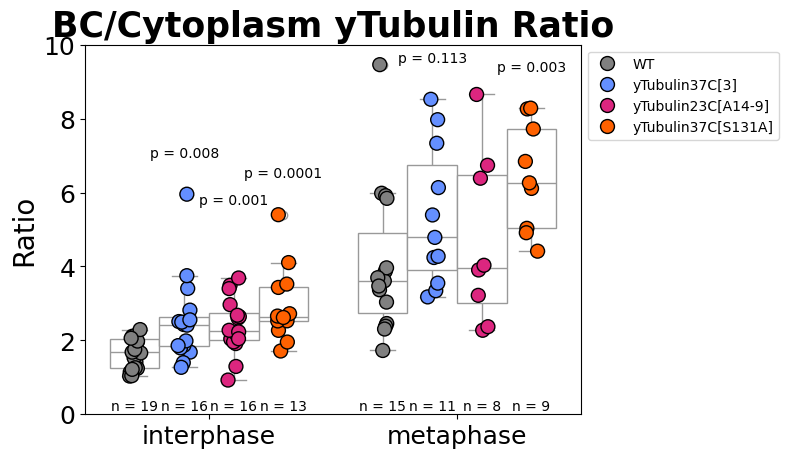

In [6]:
# plotting

p = ['grey', '#648FFF', '#DC267F', '#FE6100'] #blue, magenta, orange, and yellow palette for color blindness
po = ['interphase', 'metaphase']
ho = ['WT', 'yTubulin37C[3]', 'yTubulin23C[A14-9]', 'yTubulin37C[S131A]']
tick_size = 18
axis_size = 20
title_size = 25

sns.stripplot(data = data, x = 'phase', y = 'BC/Cyto yTub', hue = 'genotype', 
             order = po, hue_order = ho, palette = p,
             size = 10, linewidth = 1, edgecolor = 'k',
             dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'BC/Cyto yTub', hue = 'genotype', 
             order = po, hue_order = ho, palette = ['w','w','w','w'],
             dodge = True, legend = False)

plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.xlabel('')
plt.ylabel('Ratio', fontsize = axis_size)
plt.title('BC/Cytoplasm yTubulin Ratio', fontsize = title_size, fontweight = 'bold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0,10)


# stats

# interphase wt vs 37C
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['BC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin37C[3]') & (data['phase']=='interphase')]['BC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (-0.1, param2.max()+1), ha = 'center')
plt.annotate(f"n = {len(param1)}", xy = (-0.3, 0.1), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (-0.1, 0.1), ha = 'center')

# interphase wt vs 23C
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['BC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin23C[A14-9]') & (data['phase']=='interphase')]['BC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.1, param2.max()+2), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (0.1, 0.1), ha = 'center')

# interphase wt vs S131A
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['BC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='interphase')]['BC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 4)
plt.annotate(f"p = {a}", xy = (0.3, param2.max()+1), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (0.3, 0.1), ha = 'center')

# metaphase wt vs 37C
param1 = data[(data['genotype']=='WT') & (data['phase']=='metaphase')]['BC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin37C[3]') & (data['phase']=='metaphase')]['BC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.9, param2.max()+1), ha = 'center')
plt.annotate(f"n = {len(param1)}", xy = (0.7, 0.1), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (0.9, 0.1), ha = 'center')

# metaphase wt vs 23C
param1 = data[(data['genotype']=='WT') & (data['phase']=='metaphase')]['BC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin23C[A14-9]') & (data['phase']=='metaphase')]['BC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (1.1, param2.max()+2), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (1.1, 0.1), ha = 'center')

# metaphase wt vs S131A
param1 = data[(data['genotype']=='WT') & (data['phase']=='metaphase')]['BC/Cyto yTub']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='metaphase')]['BC/Cyto yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (1.3, param2.max()+1), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (1.3, 0.1), ha = 'center')

#plt.savefig('BC Cytoplasm ratio.png', dpi = 900, bbox_inches = 'tight')
#plt.savefig('BC Cytoplasm ratio.svg', dpi = 900, bbox_inches = 'tight')
plt.show();


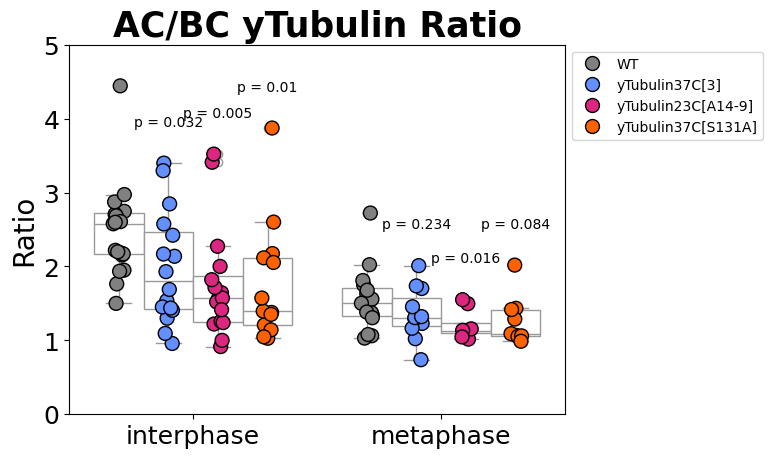

In [7]:
# plotting

p = ['grey', '#648FFF', '#DC267F', '#FE6100'] #blue, magenta, orange, and yellow palette for color blindness
po = ['interphase', 'metaphase']
ho = ['WT', 'yTubulin37C[3]', 'yTubulin23C[A14-9]', 'yTubulin37C[S131A]']
tick_size = 18
axis_size = 20
title_size = 25

sns.stripplot(data = data, x = 'phase', y = 'AC/BC yTub', hue = 'genotype', 
             order = po, hue_order = ho, palette = p,
             size = 10, linewidth = 1, edgecolor = 'k',
             dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/BC yTub', hue = 'genotype', 
             order = po, hue_order = ho, palette = ['w','w','w','w'],
             dodge = True, legend = False)

plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.xlabel('')
plt.ylabel('Ratio', fontsize = axis_size)
plt.title('AC/BC yTubulin Ratio', fontsize = title_size, fontweight = 'bold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0,5)

# stats

# interphase wt vs 37C
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC yTub']
param2 = data[(data['genotype']=='yTubulin37C[3]') & (data['phase']=='interphase')]['AC/BC yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (-0.1, param2.max()+0.5), ha = 'center')

# interphase wt vs 23C
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC yTub']
param2 = data[(data['genotype']=='yTubulin23C[A14-9]') & (data['phase']=='interphase')]['AC/BC yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.1, param2.max()+0.5), ha = 'center')

# interphase wt vs S131A
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC yTub']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='interphase')]['AC/BC yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.3, param2.max()+0.5), ha = 'center')

# metaphase wt vs 37C
param1 = data[(data['genotype']=='WT') & (data['phase']=='metaphase')]['AC/BC yTub']
param2 = data[(data['genotype']=='yTubulin37C[3]') & (data['phase']=='metaphase')]['AC/BC yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.9, param2.max()+0.5), ha = 'center')

# metaphase wt vs 23C
param1 = data[(data['genotype']=='WT') & (data['phase']=='metaphase')]['AC/BC yTub']
param2 = data[(data['genotype']=='yTubulin23C[A14-9]') & (data['phase']=='metaphase')]['AC/BC yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (1.1, param2.max()+0.5), ha = 'center')

# metaphase wt vs S131A
param1 = data[(data['genotype']=='WT') & (data['phase']=='metaphase')]['AC/BC yTub']
param2 = data[(data['genotype']=='yTubulin37C[S131A]') & (data['phase']=='metaphase')]['AC/BC yTub']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (1.3, param2.max()+0.5), ha = 'center')

#plt.savefig('AC BC ratio.png', dpi = 900, bbox_inches = 'tight')
#plt.savefig('AC BC ratio.svg', dpi = 900, bbox_inches = 'tight')
plt.show();

# Stats table

In [8]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [9]:
# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'yTubulin37C[3]', 'interphase', 'AC/Cyto yTub']
t2 = ['WT', 'yTubulin23C[A14-9]', 'interphase', 'AC/Cyto yTub']
t3 = ['WT', 'yTubulin37C[S131A]', 'interphase', 'AC/Cyto yTub']

t4 = ['WT', 'yTubulin37C[3]', 'metaphase', 'AC/Cyto yTub']
t5 = ['WT', 'yTubulin23C[A14-9]', 'metaphase', 'AC/Cyto yTub']
t6 = ['WT', 'yTubulin37C[S131A]', 'metaphase', 'AC/Cyto yTub']

t7 = ['WT', 'yTubulin37C[3]', 'interphase', 'BC/Cyto yTub']
t8 = ['WT', 'yTubulin23C[A14-9]', 'interphase', 'BC/Cyto yTub']
t9 = ['WT', 'yTubulin37C[S131A]', 'interphase', 'BC/Cyto yTub']

t10 = ['WT', 'yTubulin37C[3]', 'metaphase', 'BC/Cyto yTub']
t11 = ['WT', 'yTubulin23C[A14-9]', 'metaphase', 'BC/Cyto yTub']
t12 = ['WT', 'yTubulin37C[S131A]', 'metaphase', 'BC/Cyto yTub']

tests = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12]

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('yTub Ab stats.csv')

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,yTubulin37C[3],interphase,Mann-Whitney U Test,AC/Cyto yTub,19,16,4.18E+00,4.73E+00,1.27E+00,2.47E+00,1.36E+02,N/A,N/A,6.07772e-01,ns
1,WT,yTubulin23C[A14-9],interphase,Mann-Whitney U Test,AC/Cyto yTub,19,16,4.18E+00,3.78E+00,1.27E+00,7.79E-01,1.77E+02,N/A,N/A,4.17207e-01,ns
2,WT,yTubulin37C[S131A],interphase,Mann-Whitney U Test,AC/Cyto yTub,19,13,4.18E+00,5.23E+00,1.27E+00,3.00E+00,1.08E+02,N/A,N/A,5.64925e-01,ns
3,WT,yTubulin37C[3],metaphase,Unpaired Student's T-test,AC/Cyto yTub,15,11,6.10E+00,7.11E+00,2.58E+00,2.77E+00,-9.52E-01,24,N/A,3.50420e-01,ns
4,WT,yTubulin23C[A14-9],metaphase,Unpaired Student's T-test,AC/Cyto yTub,15,8,6.10E+00,5.47E+00,2.58E+00,2.41E+00,5.73E-01,21,N/A,5.73037e-01,ns
5,WT,yTubulin37C[S131A],metaphase,Unpaired Student's T-test,AC/Cyto yTub,15,9,6.10E+00,8.10E+00,2.58E+00,2.51E+00,-1.85E+00,22,N/A,7.78519e-02,ns
6,WT,yTubulin37C[3],interphase,Mann-Whitney U Test,BC/Cyto yTub,19,16,1.66E+00,2.51E+00,4.17E-01,1.14E+00,6.50E+01,N/A,N/A,4.17930e-03,**
7,WT,yTubulin23C[A14-9],interphase,Unpaired Student's T-test,BC/Cyto yTub,19,16,1.66E+00,2.40E+00,4.17E-01,7.53E-01,-3.64E+00,33,N/A,9.20041e-04,***
8,WT,yTubulin37C[S131A],interphase,Mann-Whitney U Test,BC/Cyto yTub,19,13,1.66E+00,2.93E+00,4.17E-01,9.83E-01,1.70E+01,N/A,N/A,4.75900e-05,****
9,WT,yTubulin37C[3],metaphase,Mann-Whitney U Test,BC/Cyto yTub,15,11,4.07E+00,5.34E+00,1.99E+00,1.90E+00,4.80E+01,N/A,N/A,7.76314e-02,ns
